# Практическая работа №1 
## Анализ данных мониторинга и моделирования для городов, пример №2
## Pandas и Numpy для работы с данными наблюдений

In [103]:
import glob
import os

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


#### Определеяем список файлов в директории

In [88]:
data_dir = 'PW1_data/example2/'

data_files = glob.glob(data_dir + '*.csv')
display(data_files)

['PW1_data/example2\\27417.csv',
 'PW1_data/example2\\27419.csv',
 'PW1_data/example2\\27428.csv',
 'PW1_data/example2\\27511.csv',
 'PW1_data/example2\\27523.csv',
 'PW1_data/example2\\27605.csv',
 'PW1_data/example2\\27606.csv',
 'PW1_data/example2\\27611.csv',
 'PW1_data/example2\\27618.csv',
 'PW1_data/example2\\27625.csv']

#### Читаем каждый файл как отдельный DataFrame

In [41]:
#Создаем пустой словарь
df4stations = {}

for file in data_files:
    st_id = str (os.path.basename (str (file)).split('.')[0])
    df4stations[st_id] = pd.read_csv(file, sep = ';')
    
    
    df4stations[st_id]['time'] = pd.to_datetime (df4stations[st_id]['time']).astype('datetime64[ns]') #, format="%Y-%m-%d %H%M%S")
    display(str (st_id) + ': ' + str (df4stations[st_id].shape))
    
    
    
    #Добавляем поле с идентификатором 
    df4stations[st_id]['id'] = st_id
    df4stations[st_id] = df4stations[st_id].set_index ('time')
    
    #display(df4stations[st_id].head())
    
    

'27417: (2921, 10)'

'27419: (2921, 10)'

'27428: (2921, 10)'

'27511: (2921, 10)'

'27523: (2921, 10)'

'27605: (2921, 10)'

'27606: (2921, 10)'

'27611: (2921, 10)'

'27618: (2921, 10)'

'27625: (2921, 10)'

#### Объединяем данные по всем станциям в один большой DataFramе, способ №1

In [4]:
df_merged1 = pd.concat ([df4stations[x] for x in df4stations.keys()])
display(df_merged1.shape)
display(df_merged1.head())



(29210, 10)

,ta,rh,ps,psl,winds,windd,cltot,cllow,prec,id
time,,,,,,,,,,
2010-01-01 00:00:00,-11.9,86,982.2,1003.9,0,0,9,0.0,0.0,27417
2010-01-01 03:00:00,-19.1,84,983.3,1005.7,0,0,3,0.0,0.2,27417
2010-01-01 06:00:00,-14.5,87,984.3,1006.3,0,0,10,10.0,0.0,27417
2010-01-01 09:00:00,-11.9,87,985.2,1007.0,0,0,12,4.0,0.0,27417
2010-01-01 12:00:00,-13.0,86,985.4,1007.2,1,40,9,0.0,0.0,27417


#### Объединяем данные по всем станциям в один большой DataFramе, способ №2

In [81]:
df_merged2 = pd.DataFrame()
for key in df4stations.keys():
    #df_merged2 = df_merged2.merge (df4stations[key].drop(columns=['id']), how = 'outer', right_index = True, left_index = True,
    #                               suffixes = (None,  '_' + str(key))) 
    
    df_merged2 = df_merged2.merge (df4stations[key].drop(columns = ['id']).rename(columns={c: c + '_' + str(key) for c in df4stations[key].columns}),
                                   how = 'outer', right_index = True, left_index = True)
    
display(df_merged2)
    


,ta_27417,rh_27417,ps_27417,psl_27417,winds_27417,windd_27417,cltot_27417,cllow_27417,prec_27417,ta_27419,...,prec_27618,ta_27625,rh_27625,ps_27625,psl_27625,winds_27625,windd_27625,cltot_27625,cllow_27625,prec_27625
time,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,-11.9,86,982.2,1003.9,0,0,9,0,0.0,-10.7,...,0.0,-11.0,92,989.5,1004.3,1,160,8,0,0.0
2010-01-01 03:00:00,-19.1,84,983.3,1005.7,0,0,3,0,0.2,-11.3,...,0.0,-11.8,94,990.1,1005.0,1,120,10,10,0.0
2010-01-01 06:00:00,-14.5,87,984.3,1006.3,0,0,10,10,0.0,-13.7,...,0.0,-11.7,94,990.7,1005.6,1,120,10,10,0.0
2010-01-01 09:00:00,-11.9,87,985.2,1007.0,0,0,12,4,0.0,-11.9,...,0.0,-10.4,93,991.1,1005.9,1,300,12,4,0.0
2010-01-01 12:00:00,-13.0,86,985.4,1007.2,1,40,9,0,0.0,-13.0,...,0.0,-8.8,83,991.0,1005.7,1,340,8,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-31 12:00:00,-11.0,82,989.8,1011.6,2,190,12,0,0.0,-11.4,...,0.0,-9.5,73,1000.5,1015.4,3,210,5,0,0.0
2010-12-31 15:00:00,-12.0,85,990.2,1012.1,2,180,10,0,0.2,-12.0,...,0.0,-11.1,82,1001.4,1016.3,2,200,10,0,0.3
2010-12-31 18:00:00,-11.6,85,989.9,1011.8,3,170,8,0,0.2,-12.5,...,0.2,-9.9,82,1001.0,1015.9,2,180,10,0,0.0


## Примеры работы с данными 
#### Построим графики температуры по всем станциям за самый жаркий день в истории Москвы (29 июня 2010 г.)


In [87]:

display(df_merged1.loc['2010-07-29':'2010-07-30'].head())
#df_merged2.loc['2010-07-29':'2010-07-30

display(df_merged2.loc['2010-07-29':'2010-07-30'].head())


,ta,rh,ps,psl,winds,windd,cltot,cllow,prec,id
time,,,,,,,,,,
2010-07-29 00:00:00,26.6,43,990.8,1009.8,1,120,4,0.0,0.0,27417
2010-07-29 03:00:00,26.0,44,989.9,1008.6,1,150,9,4.0,0.0,27417
2010-07-29 06:00:00,27.0,44,989.7,1008.5,1,160,8,4.0,0.0,27417
2010-07-29 09:00:00,34.4,28,989.0,1007.5,2,130,1,0.0,0.0,27417
2010-07-29 12:00:00,37.6,18,988.5,1006.8,4,180,8,0.0,0.0,27417


,ta_27417,rh_27417,ps_27417,psl_27417,winds_27417,windd_27417,cltot_27417,cllow_27417,prec_27417,ta_27419,...,prec_27618,ta_27625,rh_27625,ps_27625,psl_27625,winds_27625,windd_27625,cltot_27625,cllow_27625,prec_27625
time,,,,,,,,,,,,,,,,,,,,,
2010-07-29 00:00:00,26.6,43,990.8,1009.8,1,120,4,0,0.0,26.8,...,0.0,21.3,59,998.5,1011.8,1,150,6,0,0.0
2010-07-29 03:00:00,26.0,44,989.9,1008.6,1,150,9,4,0.0,25.6,...,0.0,23.2,61,997.4,1010.4,0,0,8,0,0.0
2010-07-29 06:00:00,27.0,44,989.7,1008.5,1,160,8,4,0.0,28.1,...,0.0,28.2,40,997.3,1010.2,4,120,7,0,0.0
2010-07-29 09:00:00,34.4,28,989.0,1007.5,2,130,1,0,0.0,33.1,...,0.0,35.5,29,996.6,1009.1,4,130,8,3,0.0
2010-07-29 12:00:00,37.6,18,988.5,1006.8,4,180,8,0,0.0,37.5,...,0.0,38.4,19,995.7,1008.2,5,150,6,0,0.0


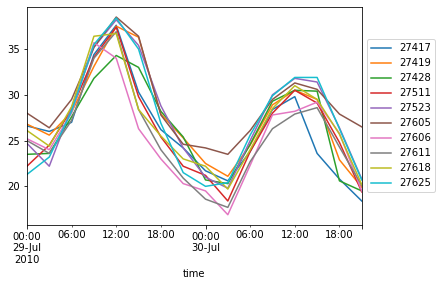

In [108]:
df_merged1.loc['2010-07-29':'2010-07-30'].pivot (columns='id', values='ta').plot ()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

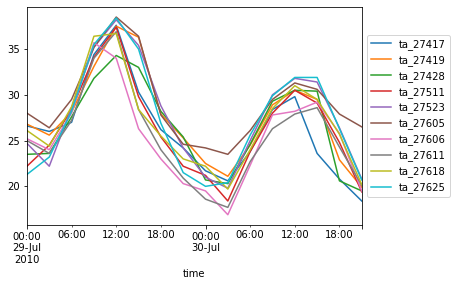

In [109]:
df_merged2.loc['2010-07-29':'2010-07-30', [c for c in df_merged2.columns if 'ta' in c]].plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

,ta_27417,rh_27417,ps_27417,psl_27417,winds_27417,windd_27417,cltot_27417,cllow_27417,prec_27417,ta_27419,...,prec_27618,ta_27625,rh_27625,ps_27625,psl_27625,winds_27625,windd_27625,cltot_27625,cllow_27625,prec_27625
time,,,,,,,,,,,,,,,,,,,,,
2010-07-29 00:00:00,26.6,43,990.8,1009.8,1,120,4,0,0.0,26.8,...,0.0,21.3,59,998.5,1011.8,1,150,6,0,0.0
2010-07-29 03:00:00,26.0,44,989.9,1008.6,1,150,9,4,0.0,25.6,...,0.0,23.2,61,997.4,1010.4,0,0,8,0,0.0
2010-07-29 06:00:00,27.0,44,989.7,1008.5,1,160,8,4,0.0,28.1,...,0.0,28.2,40,997.3,1010.2,4,120,7,0,0.0
2010-07-29 09:00:00,34.4,28,989.0,1007.5,2,130,1,0,0.0,33.1,...,0.0,35.5,29,996.6,1009.1,4,130,8,3,0.0
2010-07-29 12:00:00,37.6,18,988.5,1006.8,4,180,8,0,0.0,37.5,...,0.0,38.4,19,995.7,1008.2,5,150,6,0,0.0


#### Построим суточный ход по всем станциям за лето 2010 г.

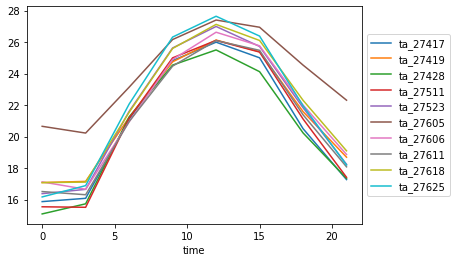

In [119]:
df_cr2 = df_merged2.loc['2010-06-01':'2010-09-01']

df_means = df_cr2.groupby(df_cr2.index.hour).mean()
df_means[[c for c in df_merged2.columns if 'ta' in c]].plot ()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

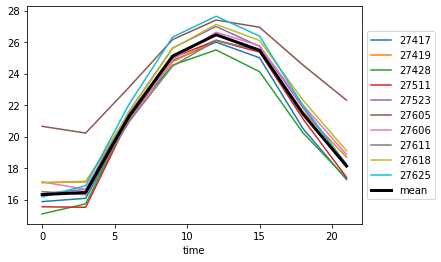

In [138]:
df_cr1 = df_merged1.loc['2010-06-01':'2010-09-01']

df_means_ta = df_cr1.pivot (columns='id', values='ta').groupby(df_cr2.index.hour).mean()

rural_mean = df_means_ta.loc[:,  [c for c in df_means_ta.columns if c != '27605']].mean(axis=1)
df_means_ta.plot ()
rural_mean.plot(color = 'black', linewidth = 3, label = 'mean')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
